# **Setup & Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel("/content/engines.xls")

print(f"Original Dataset Size: {df.shape}")
df.head()

Original Dataset Size: (1248, 28)


,Engine,Manufacturer Name,Government Designation,Other Designations,Type,Designer,Application,Developed in,Chambers,Gross Mass-kg,...,Area Ratio,Propellants,Propellant Formulation,Isp-sec,Isp (sea level)-sec,Burn time-sec,Oxidizer to Fuel Ratio,Designed for,Country,Status
0,11B97,NaN,11B97,NaN,Electric,Korolev,Interorbital Tug project,1986-,1,NaN,...,NaN,Electric/Xenon,NaN,3000.0,1.0,57600000.0,NaN,Upper Stages,Russia,Developed 1986-
1,11D121,NaN,11D121,NaN,Lox/Hydrocarbon,Korolev,N-1 stage 1 (block A) roll control engine,1969-74,1,NaN,...,NaN,GOX/Kerosene,NaN,313.0,273.0,NaN,NaN,First Stages,Russia,Developed 1969-74
2,11D23,NaN,NaN,NaN,Storable Liquid,Kosberg,NaN,NaN,1,NaN,...,NaN,N2O4/UDMH,NaN,NaN,NaN,NaN,NaN,Upper Stages,USSR,Study 1968
3,11D416,NaN,NaN,NaN,Storable Liquid,Isayev,NaN,NaN,1,NaN,...,NaN,N2O4/UDMH,NaN,NaN,NaN,NaN,NaN,Upper Stages,USSR,Study 1968
4,11D423,NaN,11D423,NaN,Storable liquid,Izotov,LK-700S manned lunar spacecraft project ascent...,1963-67,NaN,NaN,...,NaN,N2O4/UDMH,NaN,326.0,NaN,NaN,NaN,Upper Stages,Russia,Developed 1963-67


# **Data Cleaning & Filtering**

In [ ]:
# 1. Select relevant columns
# We use 'Thrust(vac)-kN', 'Chamber Pressure-bar', and 'Propellants' to predict 'Isp-sec'
keep_cols = ['Thrust(vac)-kN', 'Chamber Pressure-bar', 'Propellants', 'Isp-sec']
df_clean = df[keep_cols].copy()

# 2. Drop rows with missing values in these specific columns
df_clean = df_clean.dropna()

# 3. Basic sanity check (Remove zero or negative values if any exist)
df_clean = df_clean[df_clean['Thrust(vac)-kN'] > 0]
df_clean = df_clean[df_clean['Chamber Pressure-bar'] > 0]

print(f"Cleaned Dataset Size: {df_clean.shape}")
print(df_clean.head())

Cleaned Dataset Size: (390, 4)
    Thrust(vac)-kN  Chamber Pressure-bar       Propellants  Isp-sec
1            68.65                  71.6      GOX/Kerosene    313.0
7            29.43                   9.0         N2O4/UDMH    307.0
12          157.50                  98.1  Nitric acid/UDMH    303.0
31           86.30                  79.4      Lox/Kerosene    362.0
32           86.30                  79.4      Lox/Kerosene    362.0


# **Feature Engineering (Handling Text Data)**

In [ ]:
# Convert categorical 'Propellants' column into numeric columns (One-Hot Encoding)
df_model = pd.get_dummies(df_clean, columns=['Propellants'], drop_first=True)

# Define Features (X) and Target (y)
X = df_model.drop('Isp-sec', axis=1)  # Input: Thrust, Pressure, Propellant Type
y = df_model['Isp-sec']               # Output: Specific Impulse (Efficiency)

print("Feature matrix shape:", X.shape)

Feature matrix shape: (390, 24)


# **Train-Test Split**

In [ ]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 312
Testing samples: 78


# **Model Training (Linear Regression vs. Random Forest)**

In [ ]:
# 1. Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 2. Train Random Forest (Usually better for this data)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Models Trained Successfully.")

Models Trained Successfully.


# **Evaluation & Visualization**

Linear Regression R2 Score: 0.4701
Random Forest R2 Score:     0.4709 (Higher is better)


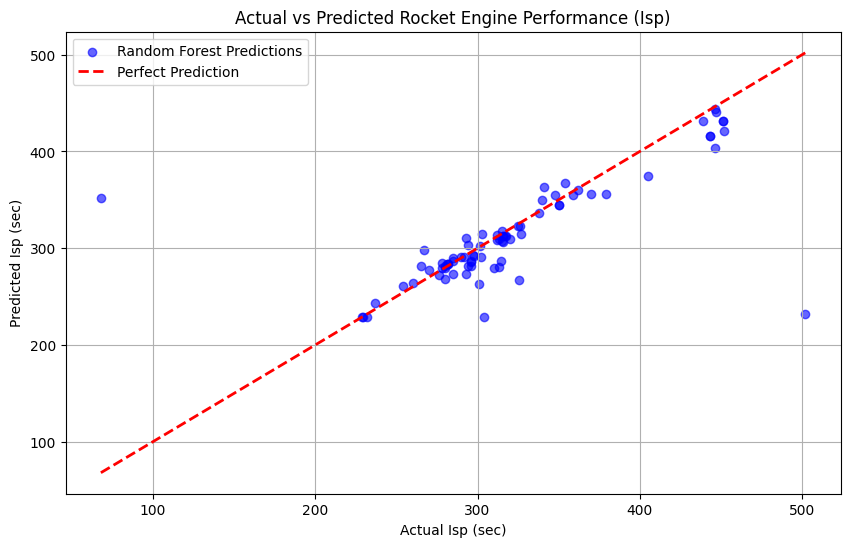

In [ ]:
# Calculate Scores
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Linear Regression R2 Score: {r2_lr:.4f}")
print(f"Random Forest R2 Score:     {r2_rf:.4f} (Higher is better)")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6, label='Random Forest Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Isp (sec)')
plt.ylabel('Predicted Isp (sec)')
plt.title('Actual vs Predicted Rocket Engine Performance (Isp)')
plt.legend()
plt.grid(True)
plt.show()